In [976]:
import scipy.io
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

2024-01-26 12:19:00.846451: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
# test

path = 'train/'

for entry in os.scandir(path):
  print(entry)

<DirEntry 'S019_128_spk.mat'>
<DirEntry 'S104_250_ann.mat'>
<DirEntry 'S121_250_spk.mat'>
<DirEntry 'S037_128_spk.mat'>
<DirEntry 'S012_128_ann.mat'>
<DirEntry 'S090_250_spk.mat'>
<DirEntry 'S062_128_ann.mat'>
<DirEntry 'S047_128_spk.mat'>
<DirEntry 'S113_250_spk.mat'>
<DirEntry 'S034_128.mat'>
<DirEntry 'S024_128.mat'>
<DirEntry 'S056_128.mat'>
<DirEntry 'S046_128.mat'>
<DirEntry 'S118_250_ann.mat'>
<DirEntry 'S087_250_ann.mat'>
<DirEntry 'S050_128_ann.mat'>
<DirEntry 'S091_250.mat'>
<DirEntry 'S081_250.mat'>
<DirEntry 'S020_128_ann.mat'>
<DirEntry 'S005_128_spk.mat'>
<DirEntry 'S092_250_ann.mat'>
<DirEntry 'S060_128_spk.mat'>
<DirEntry 'S045_128_ann.mat'>
<DirEntry 'S035_128_ann.mat'>
<DirEntry 'S010_128_spk.mat'>
<DirEntry 'S060_128.mat'>
<DirEntry 'S012_128.mat'>
<DirEntry 'S002_128.mat'>
<DirEntry 'S099_250_spk.mat'>
<DirEntry 'S106_250_spk.mat'>
<DirEntry 'S114_250.mat'>
<DirEntry 'S104_250.mat'>
<DirEntry 'S022_128_spk.mat'>
<DirEntry 'S007_128_ann.mat'>
<DirEntry 'S088_250.mat'

In [228]:
path = 'train/'
labels = []
speaks = []
ppg = []

name_labels = []
name_speaks = []
name_ppg = []

# Process files in a single pass
for entry in os.scandir(path):
    if entry.is_file() and "ann" in entry.name:  # Check for annotation files
        id = str(entry)[11:11+8]
        m = scipy.io.loadmat(entry.path)
        labels.append(m.get('labels', []))  # Use .get to avoid KeyError
        name_labels.append(entry)
        # Search for corresponding speaker and ppg files without rescanning the directory
        spk_path = f"{path}{id}_spk.mat"
        ppg_path = f"{path}{id}.mat"

        if os.path.exists(spk_path):
            spk_m = scipy.io.loadmat(spk_path)
            speaks.append(spk_m.get('speaks', []).reshape(-1))
            name_speaks.append(spk_path)
        if os.path.exists(ppg_path):
            ppg_m = scipy.io.loadmat(ppg_path)
            ppg.append(ppg_m.get('ppg', []).reshape(-1))
            name_ppg.append(ppg_path)


In [471]:
v = np.random.randint(0,108)
print(name_labels[v], name_speaks[v],name_ppg[v])

<DirEntry 'S007_128_ann.mat'> train/S007_128_spk.mat train/S007_128.mat


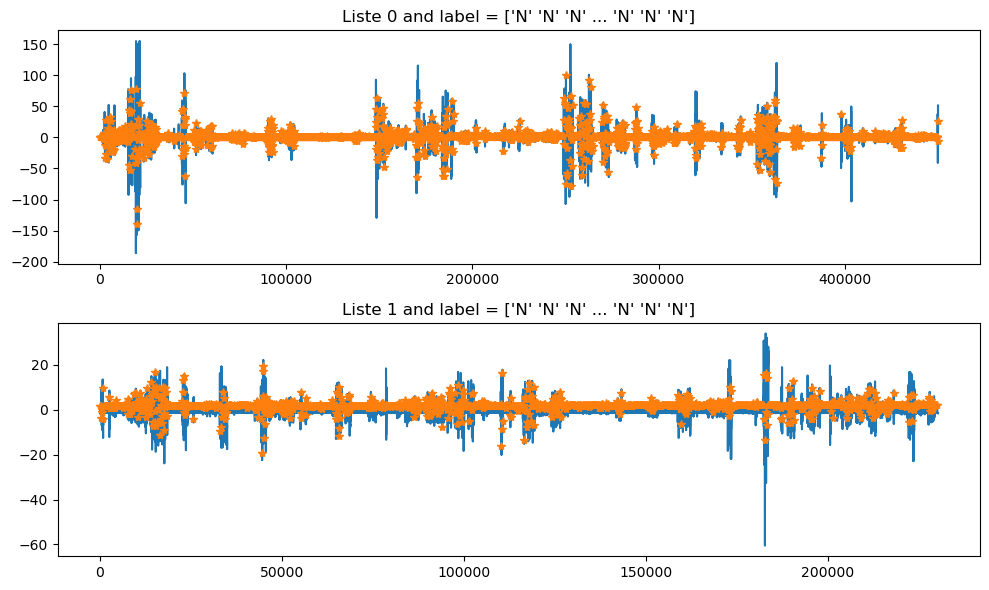

In [500]:
fig, axs = plt.subplots(2, 1, figsize=(10, 6))

axs[0].plot(ppg[0])
axs[0].plot(speaks[0],ppg[0][speaks[0]], '*')
axs[0].set_title(f"Liste {0} and label = {labels[0]}")

axs[1].plot(ppg[1])
axs[1].plot(speaks[1],ppg[1][speaks[1]], '*')
axs[1].set_title(f"Liste {1} and label = {labels[1]}")



plt.tight_layout()
plt.show()

In [568]:
def view(spike_idx,nb_spike,ppg_idx):
    
    if nb_spike%2 ==1 : 
        labels_loc = labels[ppg_idx][spike_idx-nb_spike//2:spike_idx+nb_spike//2+1]  # Labels for each point
        
        X = np.arange(speaks[ppg_idx][spike_idx-nb_spike//2-1],speaks[ppg_idx][spike_idx+nb_spike//2])
        Y = ppg[ppg_idx][speaks[ppg_idx][spike_idx-nb_spike//2-1]:speaks[ppg_idx][spike_idx+nb_spike//2]]

        X_spikes = [speaks[ppg_idx][spike_idx+i] for i in range(-nb_spike//2,nb_spike//2)]
        Y_spikes = [ppg[ppg_idx][speaks[ppg_idx][spike_idx+i]] for i in range(-nb_spike//2,nb_spike//2)]
        
    else : 
        labels_loc = labels[ppg_idx][spike_idx-nb_spike//2:spike_idx+nb_spike//2]
        
        X = np.arange(speaks[ppg_idx][spike_idx-nb_spike//2],speaks[ppg_idx][spike_idx+nb_spike//2])
        Y = ppg[ppg_idx][speaks[ppg_idx][spike_idx-nb_spike//2]:speaks[ppg_idx][spike_idx+nb_spike//2]]

        X_spikes = [speaks[ppg_idx][spike_idx+i] for i in range(-nb_spike//2,nb_spike//2)]
        Y_spikes = [ppg[ppg_idx][speaks[ppg_idx][spike_idx+i]] for i in range(-nb_spike//2,nb_spike//2)]
            
    
    
    for i, label in enumerate(labels_loc):
        plt.text(X_spikes[i], Y_spikes[i], label, fontsize='xx-large', ha='center', va='bottom')
        
    plt.scatter(X_spikes, Y_spikes,color='red', s = 100, alpha = 1,edgecolors="b", linewidths=1)
    plt.plot(X,Y)
    plt.title(f"Liste {ppg_idx} and speaks idx = {spike_idx} and speaks position = {speaks[ppg_idx][spike_idx]}")
    plt.show()

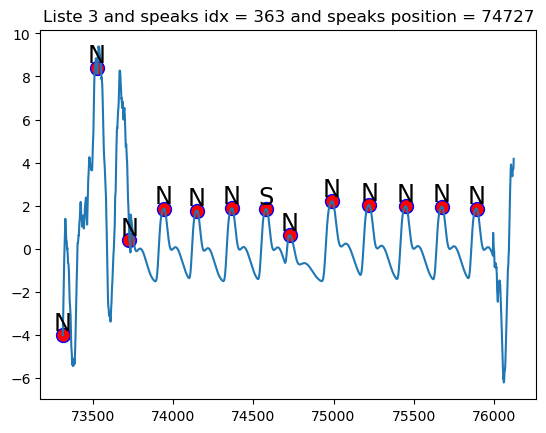

In [569]:
view(363,13,3)

In [609]:
idx_N = []
idx_V = []
idx_S = []

for j in range(len(labels)):
    idx_N+=[[i,j] for i in range(len(labels[j])) if labels[j][i] == "N"]
    idx_S+=[[i,j] for i in range(len(labels[j])) if labels[j][i] == "S"]
    idx_V+=[[i,j] for i in range(len(labels[j])) if labels[j][i] == "V"]

In [610]:
print('nb of N : ',np.shape(idx_N)[0],'\nnb of V : ',np.shape(idx_V)[0],'\nnb of S : ',np.shape(idx_S)[0],'\n')

nb of N :  228929 
nb of V :  7994 
nb of S :  9691 



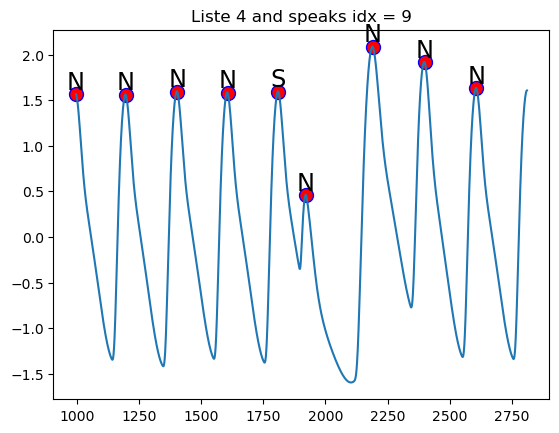

In [561]:
view(spike_idx = idx_S[2][0],
     nb_spike = 9,
     ppg_idx = idx_S[2][1])

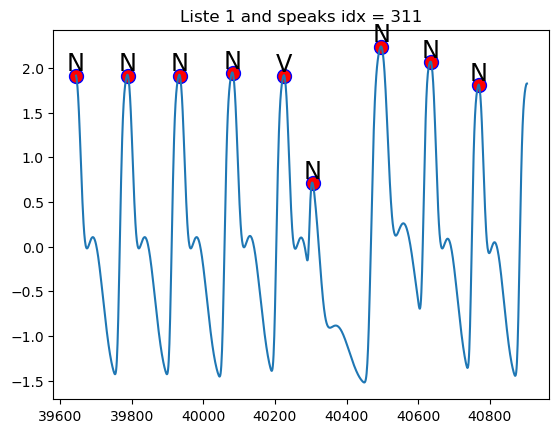

In [562]:
view(spike_idx = idx_V[3][0],
     nb_spike = 9,
     ppg_idx = idx_V[3][1])

# Upsampling raw signals 

In [494]:
def upsample_to_450000(ppg,speak):
    
    if len(ppg) == 450000 : return ppg,speak
    
    # Convertir la liste originale en un tableau NumPy pour le traitement
    original_array = np.array(ppg)
    
    speak_up = [int(round(i)) for i in speak*(450000/len(ppg))]
    
    # Créer un vecteur de positions originales et un vecteur de nouvelles positions
    original_positions = np.linspace(0, 1, len(ppg))
    new_positions = np.linspace(0, 1, 450000)
    
    # Interpolation linéaire
    interpolated_array = np.interp(new_positions, original_positions, original_array)
    
    return interpolated_array, np.array(speak_up)

In [496]:
ppg_upsample = []
speaks_upsample = []
for i in range(len(ppg)):
    ppg_upsample.append(upsample_to_450000(ppg[i],speaks[i])[0])
    speaks_upsample.append(upsample_to_450000(ppg[i],speaks[i])[1])

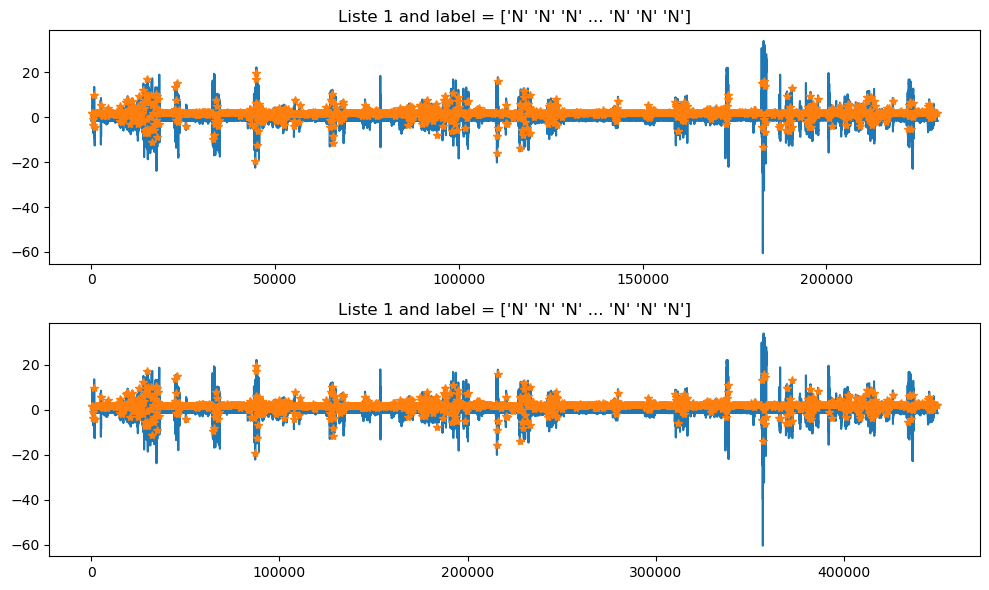

In [501]:
fig, axs = plt.subplots(2, 1, figsize=(10, 6))

axs[0].plot(ppg[1])
axs[0].plot(speaks[1],ppg[1][speaks[1]], '*')
axs[0].set_title(f"Liste {1} and label = {labels[1]}")

axs[1].plot(ppg_upsample[1])
axs[1].plot(speaks_upsample[1],ppg_upsample[1][speaks_upsample[1]], '*')
axs[1].set_title(f"Liste {1} and label = {labels[1]}")



plt.tight_layout()
plt.show()

In [616]:
def view_general(spike_idx,nb_spike,ppg_idx,ppg,speaks):
    
    if nb_spike%2 ==1 : 
        labels_loc = labels[ppg_idx][spike_idx-nb_spike//2:spike_idx+nb_spike//2+1]  # Labels for each point
        
        X = np.arange(speaks[ppg_idx][spike_idx-nb_spike//2-1],speaks[ppg_idx][spike_idx+nb_spike//2])
        Y = ppg[speaks[ppg_idx][spike_idx-nb_spike//2-1]:speaks[ppg_idx][spike_idx+nb_spike//2]]

        X_spikes = [speaks[ppg_idx][spike_idx+i] for i in range(-nb_spike//2,nb_spike//2)]
        Y_spikes = [ppg[speaks[ppg_idx][spike_idx+i]] for i in range(-nb_spike//2,nb_spike//2)]
        
    else : 
        labels_loc = labels[ppg_idx][spike_idx-nb_spike//2:spike_idx+nb_spike//2]
        
        X = np.arange(speaks[ppg_idx][spike_idx-nb_spike//2],speaks[ppg_idx][spike_idx+nb_spike//2])
        Y = ppg[speaks[ppg_idx][spike_idx-nb_spike//2]:speaks[ppg_idx][spike_idx+nb_spike//2]]

        X_spikes = [speaks[ppg_idx][spike_idx+i] for i in range(-nb_spike//2,nb_spike//2)]
        Y_spikes = [ppg[speaks[ppg_idx][spike_idx+i]] for i in range(-nb_spike//2,nb_spike//2)]
            
    
    
    for i, label in enumerate(labels_loc):
        plt.text(X_spikes[i], Y_spikes[i], label, fontsize='xx-large', ha='center', va='bottom')
        
    plt.scatter(X_spikes, Y_spikes,color='red', s = 100, alpha = 1,edgecolors="b", linewidths=1)
    plt.plot(X,Y)
    plt.title(f"Liste {ppg_idx} and speaks idx = {spike_idx} and speaks position = {speaks[ppg_idx][spike_idx]}")
    plt.show()

# Filtering signal

In [724]:
from scipy.signal import butter, filtfilt
from scipy.signal import firwin, lfilter
from scipy.signal import remez, freqz


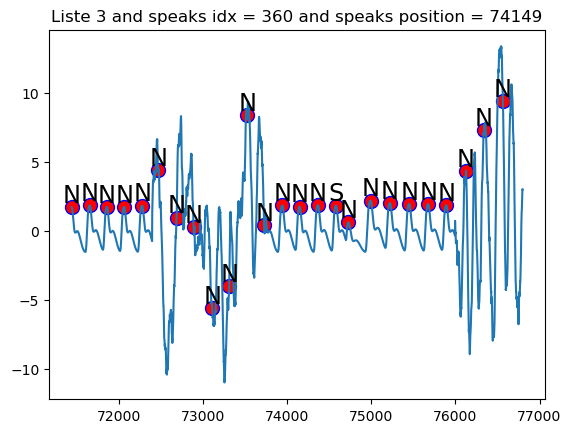

In [635]:
view(spike_idx =360,
    nb_spike = 25,
    ppg_idx = 3)

In [828]:
from scipy.signal import medfilt

def medium_filter(ppg):
    # Supposons que 'signal' est votre signal d'entrée
    # signal = ...

    # Définir la taille de la fenêtre pour les filtres médians en points d'échantillonnage
    fs = 250  # Fréquence d'échantillonnage en Hz
    window_size_200ms = int(0.2 * fs)  # 200 ms en points d'échantillonnage
    window_size_200ms += 1 - window_size_200ms % 2  # Ajuster à l'impair le plus proche si nécessaire

    window_size_600ms = int(0.6 * fs)  # 600 ms en points d'échantillonnage
    window_size_600ms += 1 - window_size_600ms % 2  # Ajuster à l'impair le plus proche si nécessaire


    # Appliquer le filtre médian avec une fenêtre de 200 ms
    filtered_signal_200ms = medfilt(ppg, kernel_size=window_size_200ms)

    # Appliquer le filtre médian avec une fenêtre de 600 ms
    filtered_signal_600ms = medfilt(filtered_signal_200ms, kernel_size=window_size_600ms)
    
    diff_signal = ppg - filtered_signal_600ms
    
    return diff_signal

In [829]:
def fir(ppg):
    # Paramètres du filtre
    fs = 250  # Fréquence d'échantillonnage en Hz
    cutoff_freq = 35  # Fréquence de coupure en Hz
    trans_width = 5  # Largeur de la bande de transition en Hz
    numtaps = 101  # Nombre de coefficients du filtre (ordre + 1)

    # Bandes du filtre : [bande passante, bande d'arrêt]
    bands = [0, cutoff_freq, cutoff_freq + trans_width, 0.5 * fs]

    # Désiré gain pour chaque bande : [gain dans bande passante, gain dans bande d'arrêt]
    desired = [1, 0]

    # Calculer les coefficients du filtre en utilisant l'algorithme Remez
    fir_coeff = remez(numtaps, bands, desired, Hz=fs)

    filtered_signal = filtfilt(fir_coeff, 1.0, ppg)
    
    return filtered_signal


### filtering everithing

In [830]:
ppg_filtered = []

for i in range(len(ppg_upsample)):
    ppg_filtered.append(fir(medium_filter(ppg_upsample[i])))

print(np.shape(ppg_filtered))

/var/folders/2f/zlpf5pr178160tpdrh83srsc0000gn/T/ipykernel_1378/1223797975.py:15: DeprecationWarning: 'remez' keyword argument 'Hz' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  fir_coeff = remez(numtaps, bands, desired, Hz=fs)


(105, 450000)


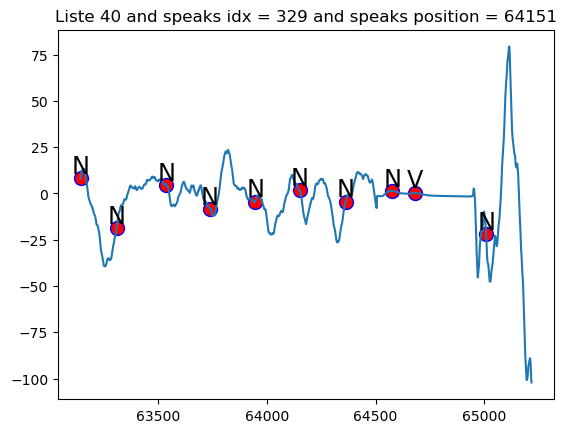

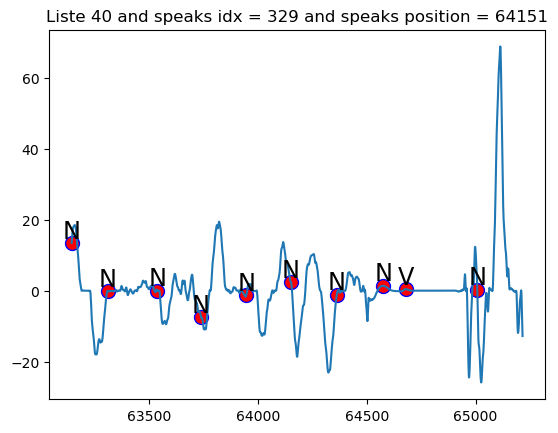

In [841]:
ppg_idx = np.random.randint(0,len(ppg))
spike_idx = np.random.randint(0,len(speaks_upsample[idx]))

view_general(spike_idx,
    nb_spike = 10,
    ppg_idx = ppg_idx,
    ppg = ppg_upsample[ppg_idx],
    speaks = speaks_upsample
    )

view_general(spike_idx,
    nb_spike = 10,
    ppg_idx = ppg_idx,
    ppg = ppg_filtered[ppg_idx],
    speaks = speaks_upsample
    )

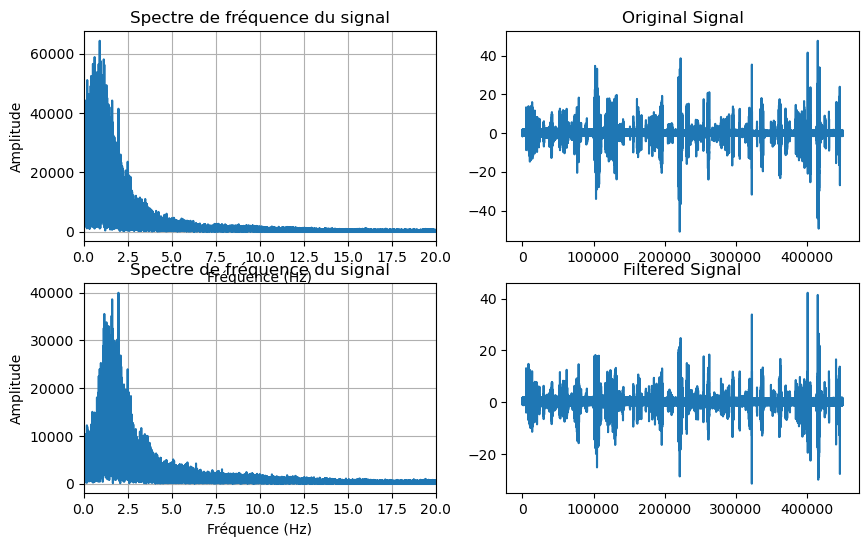

In [842]:
fig, axs = plt.subplots(2, 2, figsize=(10, 6))



#Plot Histogram ppg normal
fs = 250  # Fréquence d'échantillonnage en Hz
# Calculer la FFT du signal
fft_values = np.fft.fft(ppg_upsample[3])
n = len(ppg_upsample[3])
frequencies = np.fft.fftfreq(n, 1/fs)
# Prendre la moitié du spectre (la FFT est symétrique pour un signal réel)
n_half = n // 2
fft_values = np.abs(fft_values[:n_half])  # Prendre le module pour obtenir l'amplitude
frequencies = frequencies[:n_half]
# Tracer le spectre de fréquence
axs[0,0].plot(frequencies, fft_values)
axs[0,0].set_title("Spectre de fréquence du signal")
axs[0,0].set_xlabel("Fréquence (Hz)")
axs[0,0].set_xlim(0, 20)
axs[0,0].set_ylabel("Amplitude")
axs[0,0].grid(True)


# Plot ppg normal
axs[0,1].plot(ppg_upsample[3])
axs[0,1].set_title("Original Signal")


#Plot Histogram ppg filtered
fs = 250  # Fréquence d'échantillonnage en Hz
# Calculer la FFT du signal
fft_values = np.fft.fft(ppg_filtered[3])
n = len(filtered_signal)
frequencies = np.fft.fftfreq(n, 1/fs)
# Prendre la moitié du spectre (la FFT est symétrique pour un signal réel)
n_half = n // 2
fft_values = np.abs(fft_values[:n_half])  # Prendre le module pour obtenir l'amplitude
frequencies = frequencies[:n_half]
# Tracer le spectre de fréquence
axs[1,0].plot(frequencies, fft_values)
axs[1,0].set_title("Spectre de fréquence du signal")
axs[1,0].set_xlabel("Fréquence (Hz)")
axs[1,0].set_xlim(0, 20)
axs[1,0].set_ylabel("Amplitude")
axs[1,0].grid(True)

# Plot ppg normal
axs[1,1].plot(ppg_filtered[3])
axs[1,1].set_title("Filtered Signal")

plt.show()

# Windowing / Creation of sets

In [929]:
def windowing(speaks,ppg,label):
    
    X = []
    y = []
    X_temp = []
    '''
    if round(1/2*(speaks[1]+speaks[2])) < 600:
        X.append(ppg[:round(1/2*(speaks[1]+speaks[2]))])
        y.append(label[0])
        X_temp.append(speaks[0])
    '''
    
    for i in range(2,len(speaks)-2):
        
        size = round(1/2*(speaks[i+1]+speaks[i+2]))-round(1/2*(speaks[i]+speaks[i-1]))
        
        # Get rid of outlier : 
        if size < 600 and size > 1: 
            window = np.arange(round(1/2*(speaks[i]+speaks[i-1])),round(1/2*(speaks[i+1]+speaks[i+2])))
            X.append(ppg[window])
            y.append(label[i])
            X_temp.append(speaks[i+1]-speaks[i])
        
    '''
    if (450000 - round(1/2*(speaks[-2]+speaks[-1]))) < 600:

        X.append(ppg[round(1/2*(speaks[-2]+speaks[-1])):])
        y.append(label[-1])
        X_temp.append(speaks[-1])
    '''

    return X,y,X_temp
                       
        

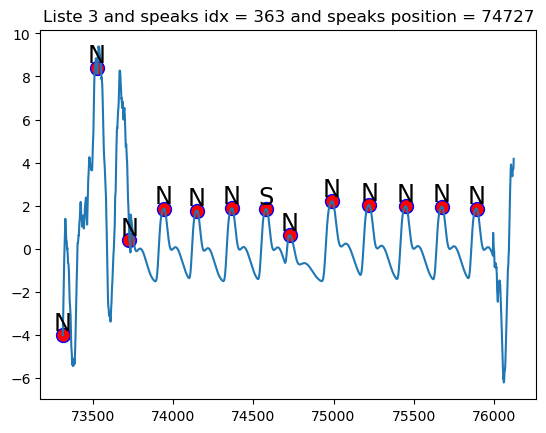

In [930]:
view(363,13,3)

In [931]:
X = []
X_temp = []
y = []


for i in range(len(speaks_upsample)):
    X += windowing(speaks_upsample[i],ppg_filtered[i],labels[i])[0]
    y += windowing(speaks_upsample[i],ppg_filtered[i],labels[i])[1]
    X_temp+=windowing(speaks_upsample[i],ppg_filtered[i],labels[i])[2]

In [932]:
n_idx_N = []
n_idx_V = []
n_idx_S = []

n_idx_N+=[i for i in range(len(y)) if y[i] == "N"]
n_idx_V+=[i for i in range(len(y)) if y[i] == "V"]
n_idx_S+=[i for i in range(len(y)) if y[i] == "S"]

print('nb of N : ',np.shape(n_idx_N)[0],'\nnb of V : ',np.shape(n_idx_V)[0],'\nnb of S : ',np.shape(n_idx_S)[0],'\n')

nb of N :  227199 
nb of V :  7906 
nb of S :  9645 



In [933]:
print('nb of N : ',np.shape(idx_N)[0],'\nnb of V : ',np.shape(idx_V)[0],'\nnb of S : ',np.shape(idx_S)[0],'\n')

nb of N :  228929 
nb of V :  7994 
nb of S :  9691 



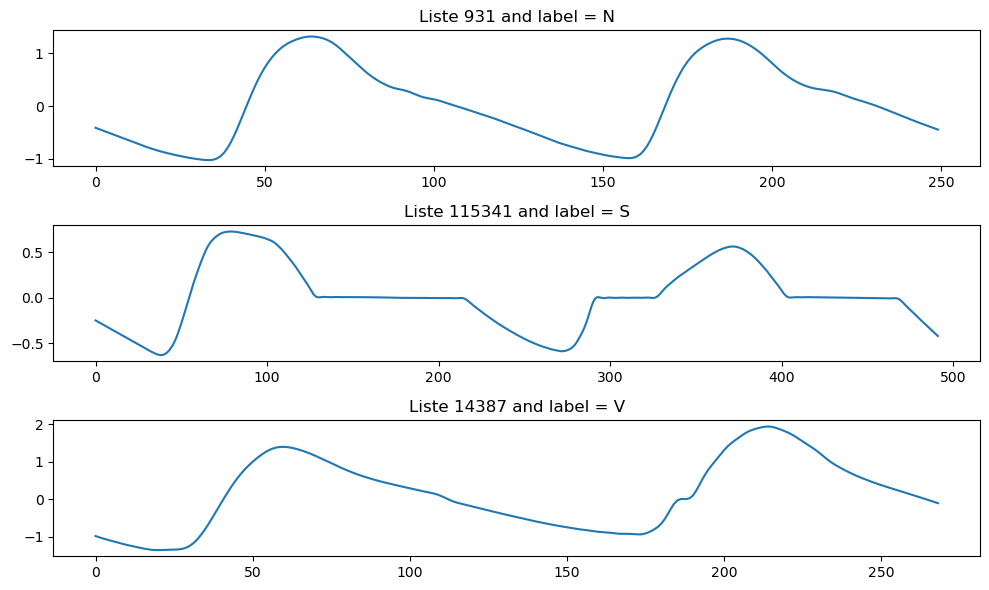

In [934]:
idx = np.random.randint(0,len(n_idx_V),3)

fig, axs = plt.subplots(3, 1, figsize=(10, 6))

axs[0].plot(X[n_idx_N[idx[0]]])
axs[0].set_title(f"Liste {idx[0]} and label = {y[idx[0]]}")

axs[1].plot(X[n_idx_S[idx[1]]])
axs[1].set_title(f"Liste {n_idx_S[idx[1]]} and label = {y[n_idx_S[idx[1]]]}")

axs[2].plot(X[n_idx_V[idx[2]]])
axs[2].set_title(f"Liste {n_idx_V[idx[2]]} and label = {y[n_idx_V[idx[2]]]}")

plt.tight_layout()
plt.show()

## Remove Outliers

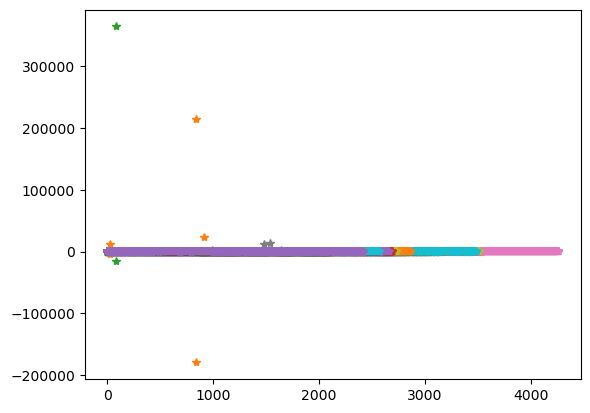

In [935]:
# Here we find outliers were the RR time is too big

for i in range(len(speaks)):
    plt.plot(speaks_upsample[i][1:]-speaks_upsample[i][:-1],'*')


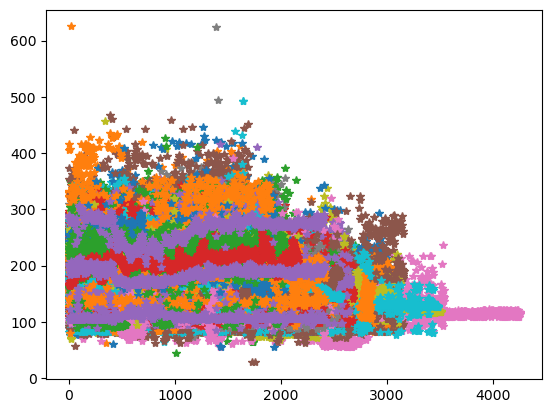

In [936]:
# A threshold for a RR max of 1000 = 1000/250hz = 4 sec

threshold = 700

for i in range(len(speaks)):
    plt.plot([ i 
              for i in speaks_upsample[i][1:]-speaks_upsample[i][:-1]
              if np.abs(i) < threshold]
             ,'*')

In [937]:
outliers = []
threshold = 700


for i in range(len(speaks_upsample)):
    for j in range(len(speaks_upsample[i])-1):
        if np.abs(speaks_upsample[i][j+1]-speaks_upsample[i][j]) > threshold:
            outliers.append([i,j])
            


In [938]:
outliers

[[41, 30],
 [41, 31],
 [41, 834],
 [41, 835],
 [41, 917],
 [52, 85],
 [52, 86],
 [85, 139],
 [85, 230],
 [85, 1355],
 [89, 1640],
 [97, 985],
 [97, 1480],
 [97, 1540],
 [97, 1548]]

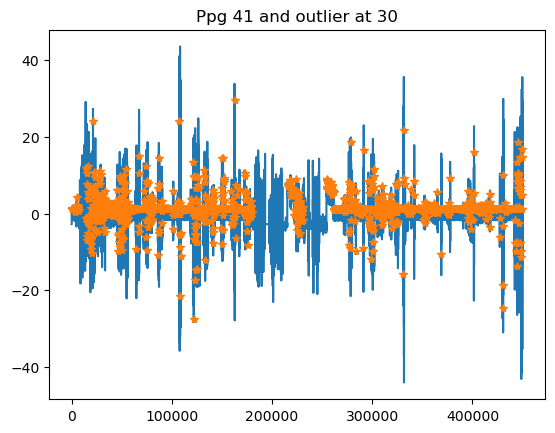

In [939]:
plt.plot(ppg[outliers[0][0]])
plt.plot(speaks[outliers[0][0]],ppg[outliers[0][0]][speaks[outliers[0][0]]],'*')
plt.title(f"Ppg {outliers[0][0]} and outlier at {outliers[0][1]}")
plt.show()

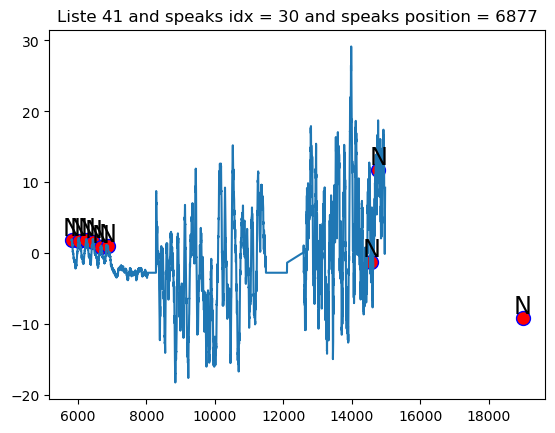

In [940]:
view(spike_idx = outliers[0][1],
     nb_spike = 9,
     ppg_idx = outliers[0][0])

# Resample

In [941]:
input_size = 700

In [942]:
import numpy as np

def upsample_to_700(original_list):
    """
    Upsample une liste pour avoir exactement 700 éléments en utilisant l'interpolation linéaire.
    
    Args:
    - original_list (list): Liste d'origine à upsample.
    
    Returns:
    - list: Liste upsampled à 700 éléments.
    """
    
    # Convertir la liste originale en un tableau NumPy pour le traitement
    original_array = np.array(original_list)
    
    # Créer un vecteur de positions originales et un vecteur de nouvelles positions
    original_positions = np.linspace(0, 1, len(original_list))
    new_positions = np.linspace(0, 1, 700)
    
    # Interpolation linéaire
    interpolated_array = np.interp(new_positions, original_positions, original_array)
    
    return interpolated_array.tolist()


In [943]:
def pad_signal_to_700(signal):
    """
    Effectue un zero padding sur un signal 1D pour atteindre une longueur de 700 points.
    
    Args:
    - signal (np.array): Le signal 1D d'entrée.
    
    Returns:
    - np.array: Le signal après zero padding.
    """
    target_length = 700
    current_length = signal.size
    
    # Calculer combien de zéros doivent être ajoutés
    padding_size = target_length - current_length
    
    if padding_size > 0:
        # Si le signal est plus court que 700 points, on ajoute des zéros
        return np.pad(signal, (0, padding_size), 'constant')
    else:
        # Si le signal est déjà égal ou plus long que 700 points, aucun padding n'est nécessaire
        return signal

In [945]:
X_reshape = []

for i in X : 
    array = pad_signal_to_700(i)
    X_reshape.append(array)

In [946]:
np.shape(X_reshape)

(244750, 700)

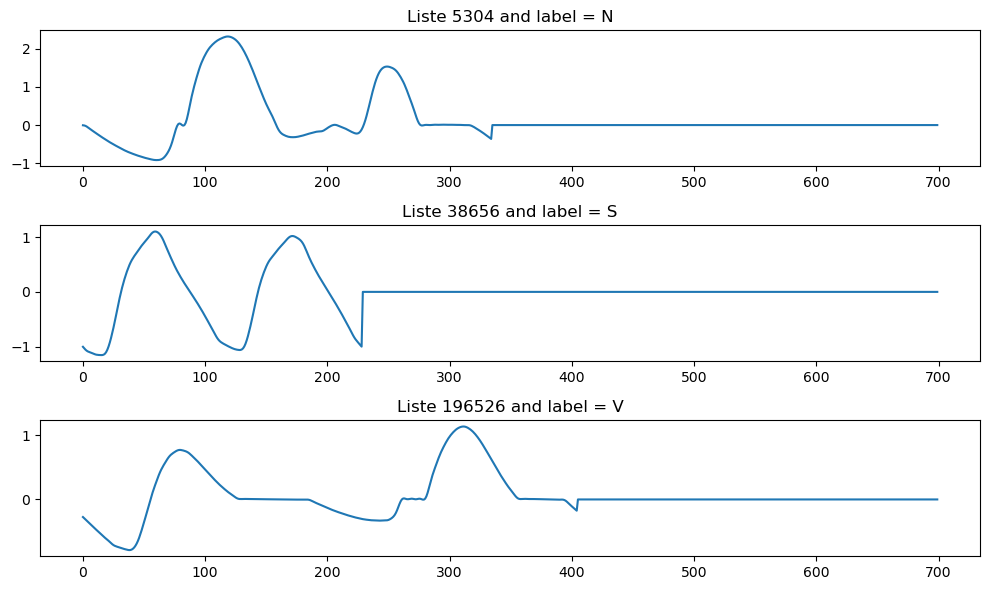

In [947]:
idx = np.random.randint(0,len(n_idx_V),3)

fig, axs = plt.subplots(3, 1, figsize=(10, 6))

axs[0].plot(X_reshape[n_idx_N[idx[0]]])
axs[0].set_title(f"Liste {idx[0]} and label = {y[idx[0]]}")

axs[1].plot(X_reshape[n_idx_S[idx[1]]])
axs[1].set_title(f"Liste {n_idx_S[idx[1]]} and label = {y[n_idx_S[idx[1]]]}")

axs[2].plot(X_reshape[n_idx_V[idx[2]]])
axs[2].set_title(f"Liste {n_idx_V[idx[2]]} and label = {y[n_idx_V[idx[2]]]}")

plt.tight_layout()
plt.show()

## Separation of sets 

### Normalisation

In [993]:
def normalize_list(lst):
    """
    Normalize the values in a list to a scale from 0 to 1.
    
    Parameters:
    lst (list): A list of numeric values to be normalized.
    
    Returns:
    list: A list of normalized values ranging from 0 to 1.
    """
    if len(lst) == 0:  # Check to ensure the list is not empty
        return lst
    
    min_val = min(lst)
    max_val = max(lst)
    range_val = max_val - min_val
    
    if range_val == 0:  # Avoid division by zero if all values are the same
        return [0] * len(lst)
    
    normalized_lst = [(x - min_val) / range_val for x in lst]
    return normalized_lst

In [998]:
temp_diff_norm = normalize_list(X_temp)

In [999]:
XX = [i.tolist() for i in X_reshape]

XX_norm = []

for i in range(len(X_temp)):
    XX_norm.append(normalize_list(XX[i]))
    XX_norm[i].append(temp_diff_norm[i])


In [1012]:
from sklearn.model_selection import train_test_split

# Supposons X et y vos données et étiquettes respectivement

# Diviser les données
X_train, X_val, y_train, y_val = train_test_split(XX_norm, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

print(f'X_train shape = {np.shape(X_train)} \nX_val shape = {np.shape(X_test)}\nX_test shape = {np.shape(X_val)}')

X_train shape = (195800, 701) 
X_val shape = (24475, 701)
X_test shape = (24475, 701)


In [1013]:
np.save('set/X_train.npy', np.array(X_train))
np.save('set/X_test.npy', np.array(X_test))
np.save('set/X_val.npy', np.array(X_val))

np.save('set/y_train.npy', np.array(y_train))
np.save('set/y_val.npy', np.array(y_val))
np.save('set/y_test.npy', np.array(y_test))

In [1080]:
idx_N_train = []
idx_N_train+=[i for i in range(len(y_train)) if y_train[i] == "N"]
idx_S_train = []
idx_S_train+=[i for i in range(len(y_train)) if y_train[i] == "S"]
idx_V_train = []
idx_V_train+=[i for i in range(len(y_train)) if y_train[i] == "V"]

idx_N_test = []
idx_N_test+=[i for i in range(len(y_test)) if y_train[i] == "N"]
idx_S_test = []
idx_S_test+=[i for i in range(len(y_test)) if y_train[i] == "S"]
idx_V_test = []
idx_V_test+=[i for i in range(len(y_test)) if y_train[i] == "V"]

idx_N_val = []
idx_N_val+=[i for i in range(len(y_val)) if y_train[i] == "N"]
idx_S_val = []
idx_S_val+=[i for i in range(len(y_val)) if y_train[i] == "S"]
idx_V_val = []
idx_V_val+=[i for i in range(len(y_val)) if y_train[i] == "V"]

In [1081]:
print('nb of N in train: ',np.shape(idx_N_train)[0],' = ',round(np.shape(idx_N_train)[0]/np.shape(y_train)[0],2),'\nnb of V in train: ',np.shape(idx_V_train)[0],' = ',round(np.shape(idx_V_train)[0]/np.shape(y_train)[0],2),'\nnb of S in train: ',np.shape(idx_S_train)[0],' = ',round(np.shape(idx_S_train)[0]/np.shape(y_train)[0],2),'\n')
print('nb of N in test: ',np.shape(idx_N_test)[0],' = ',round(np.shape(idx_N_test)[0]/np.shape(y_test)[0],2),'\nnb of V in test: ',np.shape(idx_V_test)[0],' = ',round(np.shape(idx_V_test)[0]/np.shape(y_test)[0],2),'\nnb of S in test: ',np.shape(idx_S_test)[0],' = ',round(np.shape(idx_S_test)[0]/np.shape(y_test)[0],2),'\n')
print('nb of N in val: ',np.shape(idx_N_val)[0],' = ',round(np.shape(idx_N_val)[0]/np.shape(y_val)[0],2),'%\nnb of V in val: ',np.shape(idx_V_val)[0],' = ',round(np.shape(idx_V_val)[0]/np.shape(y_val)[0],2),'\nnb of S in val: ',np.shape(idx_S_val)[0],' = ',round(np.shape(idx_S_val)[0]/np.shape(y_val)[0],2),'\n')

nb of N in train:  181783  =  0.81 
nb of V in train:  18984  =  0.08 
nb of S in train:  23114  =  0.1 

nb of N in test:  22641  =  0.81 
nb of V in test:  2382  =  0.09 
nb of S in test:  2963  =  0.11 

nb of N in val:  22641  =  0.81 %
nb of V in val:  2381  =  0.09 
nb of S in val:  2963  =  0.11 



In [1010]:
X_train[1][-1]

0.0